In [5]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import os
import math
import scipy.ndimage

In [2]:
def read_image(path, H=512, W=512):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (W,H))
    return x

In [11]:
def newEdgeOperator(imge):

    N = imge.shape[0]
    result = np.zeros([N, N], dtype=float)
    
    result[0, :] = imge[0, :]
    result[:, 0] = imge[:, 0]
    result[N-1, :] = imge[N-1, :]
    result[:, N-1] = imge[:, N-1]
    
    
    #Sober Operator to the image.
    for i in np.arange(1, N-1):
        for j in np.arange(1, N-1):
            subImage = imge[i-1:i+3, j-1:j+3]
            #print(type(subImage))
            maxValue = subImage.max()
            minValue = subImage.min()
            result[i+1, j+1] = maxValue-minValue
    
    return result

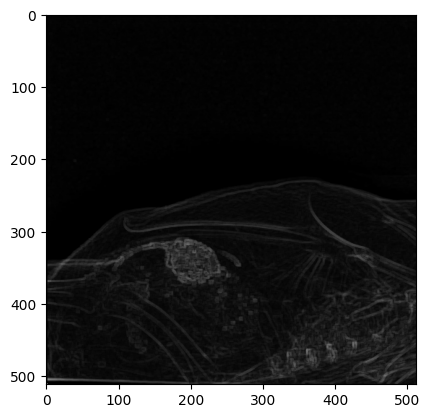

In [13]:
imageTemplate = read_image("02023SS6436_batch2_white_ok_2.jpg")
imageNewEdgeOperator = newEdgeOperator(imageTemplate)

plt.imshow(imageNewEdgeOperator, cmap=plt.get_cmap('gray'))